In [1]:
import datasets
from transformers import BertForSequenceClassification, BertTokenizer, Trainer, TrainingArguments
import torch
import evaluate
import random


/home/rouven/python/NLP/Sentiment_FastAPI_Project/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from datasets import load_dataset

data = load_dataset("imdb")

In [3]:
data

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [4]:
data = datasets.DatasetDict({"train": data["train"], "test": data["test"]})

In [5]:
data

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
})

In [6]:
data["train"]["text"][1]

'"I Am Curious: Yellow" is a risible and pretentious steaming pile. It doesn\'t matter what one\'s political views are because this film can hardly be taken seriously on any level. As for the claim that frontal male nudity is an automatic NC-17, that isn\'t true. I\'ve seen R-rated films with male nudity. Granted, they only offer some fleeting views, but where are the R-rated films with gaping vulvas and flapping labia? Nowhere, because they don\'t exist. The same goes for those crappy cable shows: schlongs swinging in the breeze but not a clitoris in sight. And those pretentious indie movies like The Brown Bunny, in which we\'re treated to the site of Vincent Gallo\'s throbbing johnson, but not a trace of pink visible on Chloe Sevigny. Before crying (or implying) "double-standard" in matters of nudity, the mentally obtuse should take into account one unavoidably obvious anatomical difference between men and women: there are no genitals on display when actresses appears nude, and the s

{0: "negative", 1: "positive"}

In [7]:
data["train"]["label"][1]


0

In [8]:
model = BertForSequenceClassification.from_pretrained("google-bert/bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("google-bert/bert-base-uncased")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
data

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
})

In [10]:
lengths = [len(tokenizer.encode(x)) for x in data["train"]["text"]]


Token indices sequence length is longer than the specified maximum sequence length for this model (720 > 512). Running this sequence through the model will result in indexing errors


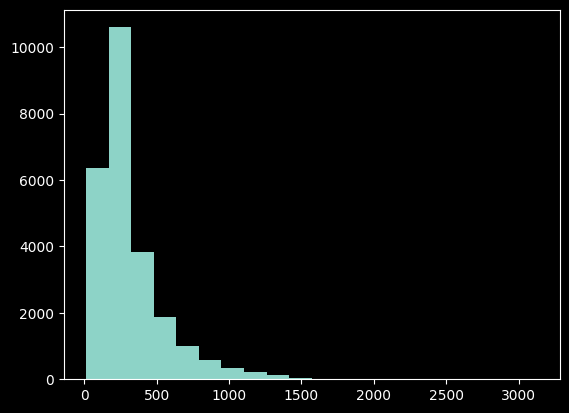

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
ax.hist(x=lengths, bins=20)
plt.show()

In [12]:
def tokenize(examples):
    return tokenizer(examples["text"], max_length=512, padding=True, truncation=True)

In [13]:
data = data.map(tokenize)
data

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 25000
    })
})

In [18]:
import numpy as np

In [ ]:
label_dist = np.array(data["train"]["label"])

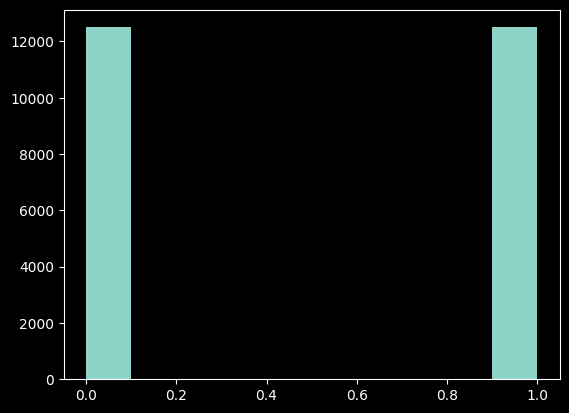

In [ ]:
plt.hist(label_dist)
plt.show()

In [ ]:
metric = evaluate.load("accuracy")

def compute_metric(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
training_args = TrainingArguments(
    ouptut_dir = "ML_models",
    eval_strategy= "epoch",
    num_train_epochs=2
)